Clusters:  [1 0 1 ... 3 3 3]


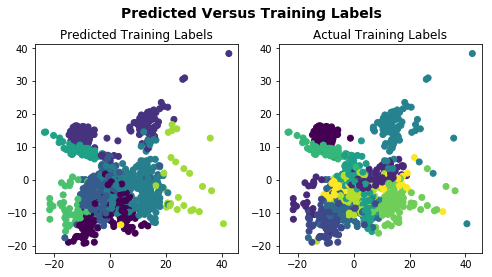

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.manifold import Isomap

# from elice_utils import EliceUtils
# eu = EliceUtils()

np.random.seed(42)

digits = load_digits()

# Q1. scale digits dataset
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.25, random_state=42)

# Q2. Create the KMeans model
kmeans = KMeans(n_clusters=8 , init='k-means++', random_state=42)

# Q3. Compute cluster centers and predict cluster index for each samples 
clusters = kmeans.fit_predict(x_train)
print('Clusters: ', clusters)

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(x_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

plt.show("digits.png") 
# eu.send_image("digits.png")

